# Aufgabe 10
### a)
Der Metropolis-Hastings-Algorithmus benutzt an einem Startpunkt x eine Schrittvorschlags-PDF, die vom Ort x abhängt und anhand der ein neuer Ort y ausgewählt wird: $P(y|x).$
Der Vorschlag wird mit der Wahrscheinlichkeit $$P = min\left( 1, \frac{W(y)P(x|y)}{W(x)P(y|x)}  \right)$$ akzeptiert. 
Bei einer symmetrischen Vorschlagsdichte $P(y|x) = P(x|y)$ und der Boltzmann-Verteilung als Wahrscheinlichkeitsverteilung $W$ ergibt sich der ursprüngliche Metropolis-Algorithmus.  
Wenn man nun eine Gaußverteilung (mit Mittelwert x) verwendet, $$P(y|x)\propto \exp\left( - \frac{(y-x)^2}{2\sigma^2} \right), $$ 
ergibt sich vom Punkt y aus dieselbe Wahrscheinlichkeit, wieder bei x zu landen:
$$P(x|y)\propto \exp\left( - \frac{(x-y)^2}{2\sigma^2} \right). $$
Also ist $P(y|x) = P(x|y)$ und damit ergibt sich der Metropolis-Algorithmus.

### b) und c)
Implementieren Sie den Metropolis-Algorithmus mit einer gleichverteilten Schrittvorschlags-PDF im Intervall $(𝑥_𝑖 − 𝑠,\ 𝑥_𝑖 + 𝑠),$ wobei $𝑥_𝑖$ die aktuelle Position und $s$ die Schrittweite ist.

Erzeugen Sie mit ihrer implementierten sample-Methode $10^5$ Zufallszahlen aus
der Planck-Verteilung. Achten Sie darauf, dass die Planck-Verteilung im Intervall
$(0, \infty)$ definiert ist. Nutzen Sie $x_0 = 30$ als Startwert und step_size = 2 als
Schrittweite. Vergleichen Sie die erzeugten Zufallszahlen mit der zugrundeliegenden
Verteilung

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Planck(x, T):
    return x**3/(np.exp(x/T)-1)

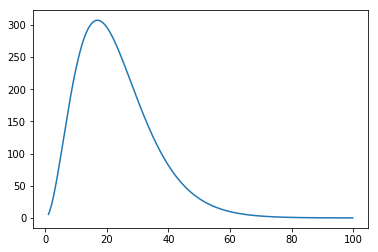

In [3]:
x = np.arange(1,100,.1)
planck = Planck(x,6)
plt.plot(x,planck)

In [4]:
def Metropolis(W, Ort, T, s, Iterationen, Menge):
    Orte = np.ones(Menge)*Ort
    for i in range(0,Iterationen):
        j = 0
        for x in Orte:
            Schrittvorschlag = s*np.random.uniform(-1,1)
            y = Orte[j] + Schrittvorschlag
            if W(y, T) > W(Ort, T) and y > 0:
                Orte[j] += Schrittvorschlag
                j += 1
            elif W(y, T) < W(Ort, T) and y > 0:
                random = np.random.uniform(0,1)
                WSK = W(y, T)/W(Orte[j], T)
                if random < WSK:
                    Orte[j] += Schrittvorschlag
                    j += 1
                else:
                    j += 1
    return Orte

### d)

In [5]:
x1 = Metropolis(Planck, 30, 6, 2, 1, 10**4)
x5 = Metropolis(Planck, 30, 6, 2, 5, 10**4)
x10 = Metropolis(Planck, 30, 6, 2, 10, 10**4)
x50 = Metropolis(Planck, 30, 6, 2, 50, 10**4)

In [6]:
x100 = Metropolis(Planck, 30, 6, 2, 100, 10**4)

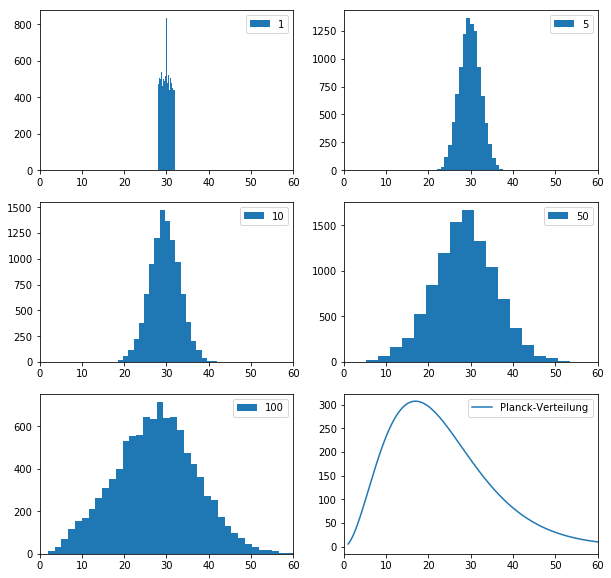

In [9]:
#plt.title('Iterationen')
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
plt.hist(x1, bins = 20, label = '1')
plt.xlim(0,60)
plt.legend()
plt.subplot(3, 2, 2)
plt.hist(x5, bins = 20, label = '5')
plt.xlim(0,60)
plt.legend()
plt.subplot(3, 2, 3)
plt.hist(x10, bins = 20, label = '10')
plt.xlim(0,60)
plt.legend()
plt.subplot(3, 2, 4)
plt.hist(x50, bins = 20, label = '50')
plt.xlim(0,60)
plt.legend()
plt.subplot(3, 2, 5)
plt.hist(x100, bins = 40, label = '100')
plt.xlim(0,60)
plt.legend()
plt.subplot(3, 2, 6)
plt.plot(np.arange(1,100,.1), Planck(np.arange(1,100,.1),6), label = 'Planck-Verteilung')
plt.xlim(0,60)
plt.legend()